In [139]:
from scipy import stats
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [116]:
data = pd.read_csv("/Users/mac/Desktop/GoMyCode/Credit_card_dataset.csv")

In [117]:
data.isna().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [118]:
data.duplicated().sum()

0

In [119]:
data.shape

(8950, 6)

In [120]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [121]:
data.tail()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778
8949,C19190,0.666667,1093.25,63.165404,1200.0,127.040008


In [122]:
data.corr()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
BALANCE_FREQUENCY,1.000000,0.133674,0.065008,0.095843,0.099388
PURCHASES,0.133674,1.000000,0.603264,0.356963,-0.051474
PAYMENTS,0.065008,0.603264,1.000000,0.421861,0.453238
CREDIT_LIMIT,0.095843,0.356963,0.421861,1.000000,0.303985
CASH_ADVANCE,0.099388,-0.051474,0.453238,0.303985,1.000000


In [123]:
data.dtypes

CUST_ID               object
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object

In [124]:
# Remplacer les valeurs manquantes dans la colonne 'Âge' par la moyenne des valeurs existantes
median_age = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(median_age, inplace=True)

In [125]:
data.isna().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [126]:
data.drop("CUST_ID", axis = 1, inplace = True)

# Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf83eaaad0>,
      dtype=object)

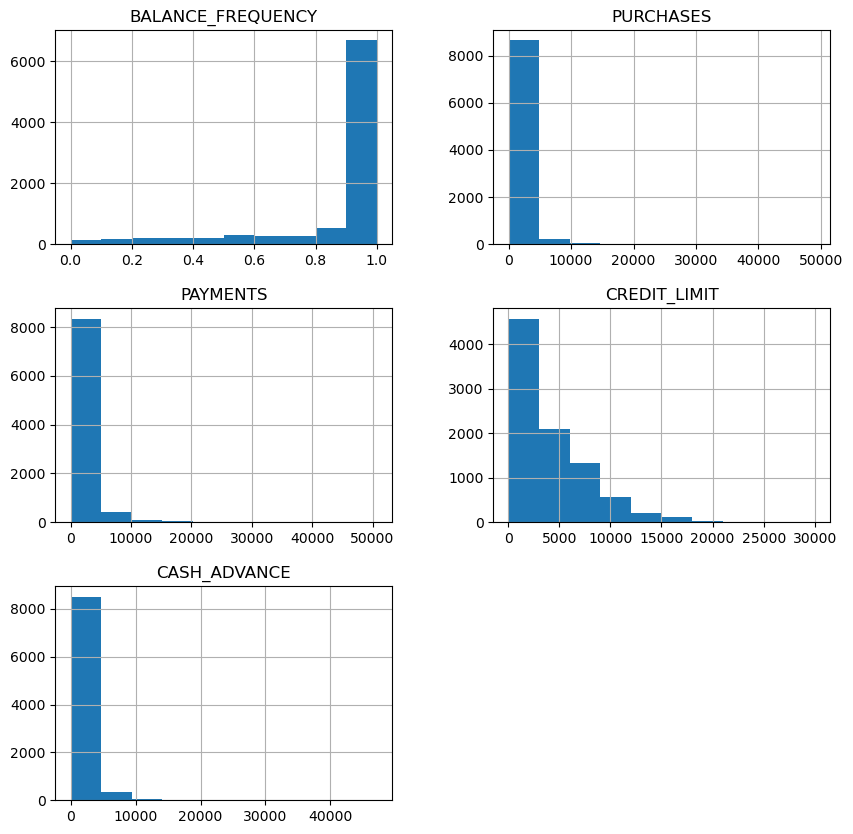

In [127]:
data.hist(figsize = (10,10))

In [128]:
def handle_outliers(df, columns, replacement='median', z_threshold=3):
    """
    Identifie les valeurs aberrantes dans un DataFrame pour les colonnes spécifiées et les remplace.

    Parameters:
    - df: DataFrame
    - columns: list of str, colonnes pour lesquelles gérer les valeurs aberrantes
    - replacement: str or float, valeur pour remplacer les valeurs aberrantes ('median' par défaut)
    - z_threshold: int, seuil Z-score pour identifier les valeurs aberrantes (3 par défaut)

    Returns:
    - DataFrame avec les valeurs aberrantes remplacées
    - Booléen indiquant si des valeurs aberrantes ont été identifiées et gérées
    """

    df_no_outliers = df.copy()
    outliers_detected = False

    for column in columns:
        # Calculer les Z-scores pour les valeurs de la colonne
        z_scores = stats.zscore(df_no_outliers[column])

        # Identifier les valeurs aberrantes
        outliers = (z_scores > z_threshold) | (z_scores < -z_threshold)

        # Remplacer les valeurs aberrantes par la médiane (ou une autre valeur spécifiée)
        if any(outliers):
            outliers_detected = True
            if replacement == 'median':
                replacement_value = df_no_outliers[column].median()
            else:
                replacement_value = replacement

            df_no_outliers[column] = df_no_outliers[column].apply(
                lambda x: replacement_value if x in outliers.values else x
            )

    return df_no_outliers, outliers_detected

In [129]:
# Gérer les valeurs aberrantes pour les colonnes spécifiées
columns_to_handle = ['BALANCE_FREQUENCY', 'PURCHASES','PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE']
df_handled, outliers_detected = handle_outliers(data, columns_to_handle)

# Afficher le DataFrame après gestion des valeurs aberrantes
print("DataFrame après gestion des valeurs aberrantes:")
print(df_handled)

# Afficher si des valeurs aberrantes ont été détectées et gérées
print(f"Detection de valeures aberrantes : " ,outliers_detected)

DataFrame après gestion des valeurs aberrantes:
      BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
0              0.818182      95.40   201.802084        1000.0      0.000000
1              0.909091     361.28  4103.032597        7000.0   6442.945483
2              1.000000     773.17   622.066742        7500.0      0.000000
3              0.636364    1499.00   856.901546        7500.0    205.788017
4              1.000000      16.00   678.334763        1200.0      0.000000
...                 ...        ...          ...           ...           ...
8945           1.000000     291.12   325.594462        1000.0      0.000000
8946           1.000000     300.00   275.861322        1000.0      0.000000
8947           0.833333     144.40    81.270775        1000.0      0.000000
8948           0.833333     361.28    52.549959         500.0     36.558778
8949           0.666667    1093.25    63.165404        1200.0    127.040008

[8950 rows x 5 columns]
Detection de va

# Standarisation des donnees : 

In [133]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Ajustement et transformation des données
df_scaled = scaler.fit_transform(data)

# Conversion du tableau NumPy résultant en DataFrame pour une meilleure lisibilité
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

In [134]:
# Affichage du DataFrame standardisé
print(df_scaled)

      BALANCE_FREQUENCY  PURCHASES  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
0             -0.249434  -0.424900 -0.528979     -0.960378     -0.466786
1              0.134325  -0.469552  0.818642      0.688678      2.605605
2              0.518084  -0.107668 -0.383805      0.826100     -0.466786
3             -1.016953   0.232058 -0.598688      0.826100     -0.368653
4              0.518084  -0.462063 -0.364368     -0.905410     -0.466786
...                 ...        ...       ...           ...           ...
8945           0.518084  -0.333293 -0.486217     -0.960378     -0.466786
8946           0.518084  -0.329136 -0.503396     -0.960378     -0.466786
8947          -0.185477  -0.401965 -0.570615     -0.960378     -0.466786
8948          -0.185477  -0.469552 -0.580536     -1.097800     -0.449352
8949          -0.889033   0.042146 -0.576869     -0.905410     -0.406205

[8950 rows x 5 columns]


# Visualisation :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf82b08b50>,
      dtype=object)

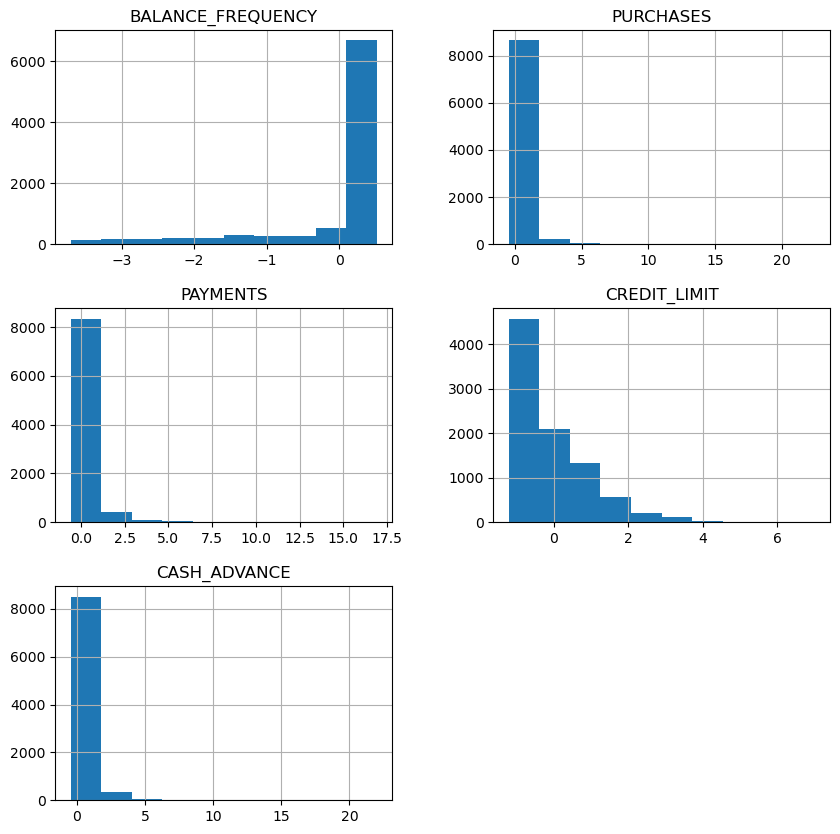

In [135]:
df_scaled.hist(figsize = (10,10))

# Clustering hiérarchique

In [136]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(df_scaled[['PAYMENTS', 'CREDIT_LIMIT']])


In [137]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

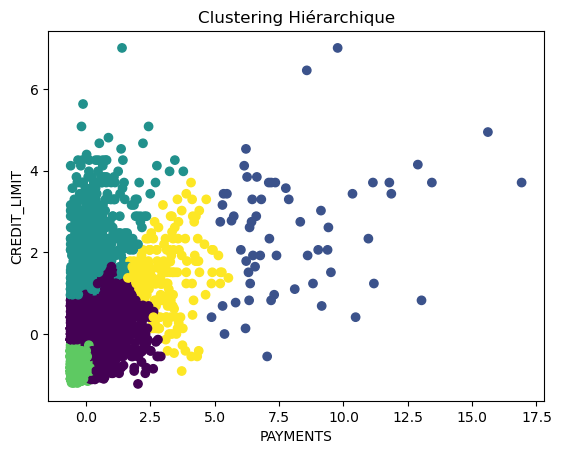

In [138]:
plt.scatter(df_scaled['PAYMENTS'], df_scaled['CREDIT_LIMIT'], c=data['Hierarchical_Cluster'], cmap='viridis')
plt.title('Clustering Hiérarchique')
plt.xlabel('PAYMENTS')
plt.ylabel('CREDIT_LIMIT')
plt.show()

# Visualisation du dendogramme

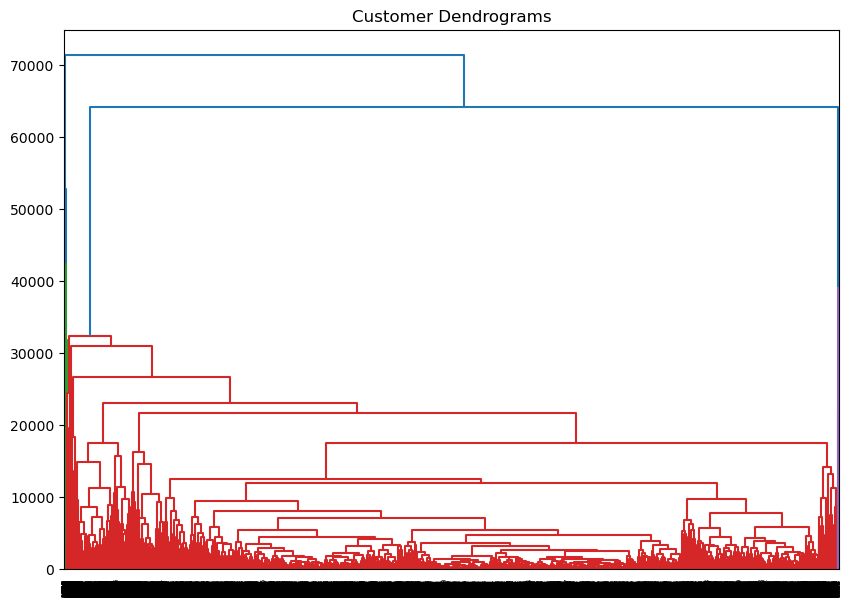

In [140]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

# Clustering partitionnel (K-means)

In [141]:
kmeans_cluster = KMeans(n_clusters = 5, random_state = 42)
data['KMeans_Cluster'] = kmeans_cluster.fit_predict(df_scaled[['PAYMENTS', 'CREDIT_LIMIT']])


# Tracer les clusters

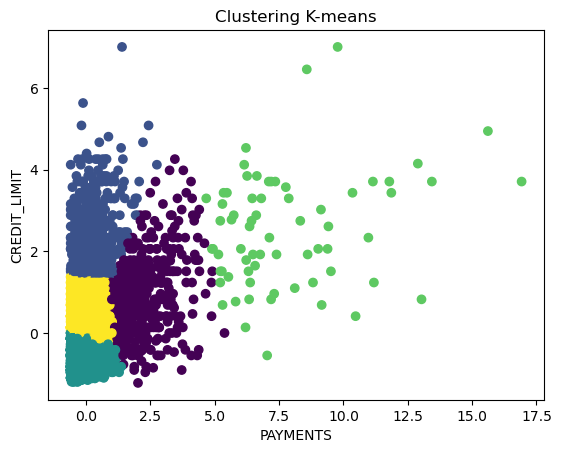

In [142]:
plt.scatter(df_scaled['PAYMENTS'], df_scaled['CREDIT_LIMIT'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('Clustering K-means')
plt.xlabel('PAYMENTS')
plt.ylabel('CREDIT_LIMIT')
plt.show()

# Trouver la meilleure valeur k pour K-means

In [143]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[['PAYMENTS', 'CREDIT_LIMIT']])
    inertia.append(kmeans.inertia_)

# Tracer la méthode du coude

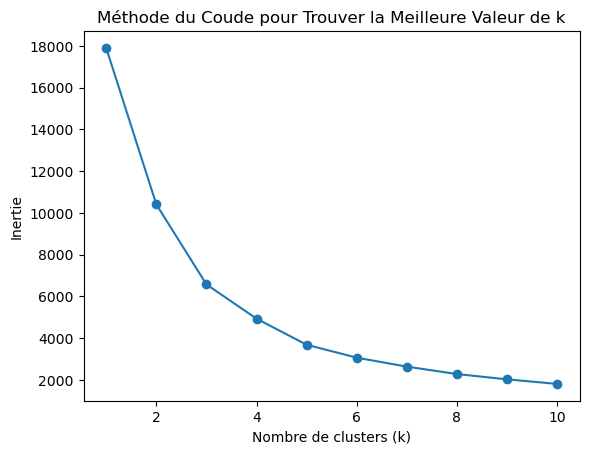

In [144]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude pour Trouver la Meilleure Valeur de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

# Interprétation :

In [145]:
pip install requests


Note: you may need to restart the kernel to use updated packages.
